# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv',  sep='\t') #откроем и прочитаем датасет
data.info() #узнаем информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

проверим тип данных каждого столбца:
- total_images - int
- last_price - float
- total_area - float
- first_day_exposition - object, но должен быть datetime, тк это дата
- rooms - int
- ceiling_height - float
- floors_total - float, но должен быть int, тк не может быть 2,5 этажа
- living_area - float
- floor - int
- is_apartment - object, но должен быть bool, тк указанно в задании
- studio - bool
- open_plan - bool
- kitchen_area - float
- balcony - float
- locality_name - object
- airports_nearest - float
- cityCenters_nearest - float
- parks_around3000 - float, но должен быть int, тк не может быть 2,5 парка
- parks_nearest - float
- ponds_around3000 - float, но должен быть int, тк не может быть 2,5 водоёма
- ponds_nearest - float
- days_exposition - float, но должен быть int, тк необходимо указать целое число дней

In [2]:
data.head() #выведем первым 5 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


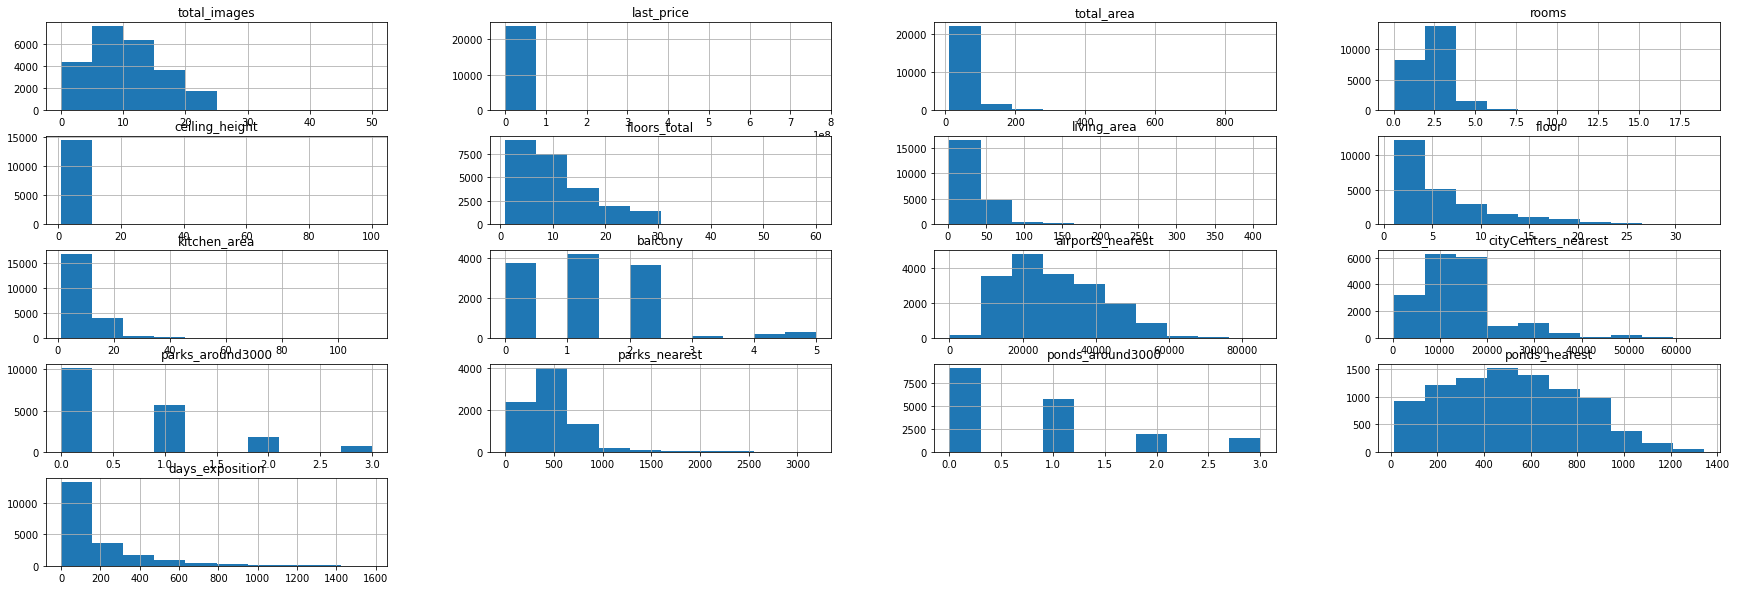

In [3]:
data.hist(figsize=(30, 10)); #построем гистограмму каждого столбца

### Выполните предобработку данных

In [4]:
data.duplicated().sum() #явных дубликатов нет

0

In [5]:
#применим метод value_counts() к каждому столбцу, который вернет уникальные значения и найдет пропущенные значения
#столбцы ниже не трогаем
display(data['total_images'].value_counts())
display(data['ceiling_height'].value_counts())
display(data['floor'].value_counts())
display(data['total_area'].value_counts())
display(data['rooms'].value_counts())
display(data['airports_nearest'].value_counts())
display(data['cityCenters_nearest'].value_counts())
display(data['parks_nearest'].value_counts())
display(data['studio'].value_counts())
display(data['open_plan'].value_counts())
display(data['kitchen_area'].value_counts())
display(data['locality_name'].value_counts())


10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtype: int64

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

37434.0    61
21928.0    32
39946.0    30
44870.0    30
18732.0    27
           ..
53478.0     1
20335.0     1
33699.0     1
26945.0     1
20875.0     1
Name: airports_nearest, Length: 8275, dtype: int64

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
5278.0      1
11575.0     1
3205.0      1
12747.0     1
4234.0      1
Name: cityCenters_nearest, Length: 7642, dtype: int64

441.0     67
392.0     41
173.0     41
456.0     40
471.0     32
          ..
2489.0     1
786.0      1
793.0      1
92.0       1
929.0      1
Name: parks_nearest, Length: 995, dtype: int64

False    23550
True       149
Name: studio, dtype: int64

False    23632
True        67
Name: open_plan, dtype: int64

6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
7.12        1
13.73       1
14.74       1
53.10       1
16.74       1
Name: kitchen_area, Length: 971, dtype: int64

Санкт-Петербург                               15721
посёлок Мурино                                  522
посёлок Шушары                                  440
Всеволожск                                      398
Пушкин                                          369
                                              ...  
посёлок при железнодорожной станции Вещево        1
деревня Терпилицы                                 1
поселок Коробицыно                                1
поселок городского типа Большая Ижора             1
коттеджный поселок Счастье                        1
Name: locality_name, Length: 364, dtype: int64

In [6]:
#далее работаем с столбцами в которых нужно внести изменения
#изменит тип и переведем в читаемый формат(время в таблице не указано)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [7]:
data['floors_total'].isna().astype('int')

0        0
1        0
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    0
23698    0
Name: floors_total, Length: 23699, dtype: int64

указанные значение в столбце не зависят друг от друга и расположены в таблице в рандомном порядке, есть пустые ячейки.Между данными ничего общего нет, оставим как есть. Изменила тип столбца

In [8]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
#изменим тип на int, тк не может быть половина парка

In [9]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')
#по аналоггии с парками, изменим тип на int, тк не может быть половина водоема

In [10]:
data['days_exposition'].isnull().sum().astype('int')

3181

изменим тип на int,тк необходимо указать значение целого дня(числа). Данный столбец является важным, поэтому оставляем его как есть

In [11]:
data['last_price'] = data['last_price'].astype('int')
#изменим тип на int,тк необходимо указать значение целого числа(часа)

In [12]:
data['balcony'] = data['balcony'].fillna(0)  
#к пропускам информации о балконах можно отнести человеческий фактор, так как техническая характеристика помещения предпологает постройку данного вида. квартира без балкона не является отклонением от нормы, в случае, если об этом заранее не сообщил клиент

In [13]:
for t in data['ceiling_height'].unique():
    data.loc[(data['ceiling_height'] == t) & (data['floors_total'].isna()), 'floors_total'] = \
    data.loc[(data['ceiling_height'] == t), 'floors_total'].median()  
data.head() #к пропускам можно отнести человеческий фактор, посчитаем высоту медианным значением

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


In [14]:
data['is_apartment'] = data['is_apartment'].fillna(False)
#заменим все пропущенные значения на False. Данный столбец менее заполненый из всей таблицы

In [15]:
data['living_area'].value_counts()
data['living_area'].describe()
#вызвав метод value_counts() проанализируем столбец, выбрав каждое уникальное значение и проанализировав частоту его встречаемости
#вызвав функцию describe() узнаем описательную статистику столбца

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [16]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               77
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

корректно посчитать living_area и kitchen_area не получится , тк у нас имеются квартиры студии, поэтому оставим эти данные так как есть. 
про ceiling_height написано ранее. 
airports_nearest, cityCenters_nearest - возможно эти данные не заполнены по причине того, что в ближайщем радиусе нет аэропорта или большая удаленность от центра.
ponds_nearest, parks_nearest - причина отсутсвия данных неизвестна, заполнять нуля не будем, пропуски трогать не будем.
floors_total отработала ранее, а locality_name отработаю дальше

### Добавьте в таблицу новые столбцы

In [17]:
data['price_per_square_meter'] = (data['last_price'] / data['total_area']).round(2)
data['price_per_square_meter'] .head()
#посчитаем цену за квадратный метр. для этого на стоимость объекта поделим общую площадь, округлив до 2-х знаков после запятой
#далее метры переведем в км, округлим до целых чисел и выведем первые 5 строк на экран

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: price_per_square_meter, dtype: float64

In [18]:
data['cityCenters_nearest'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695     True
23696     True
23697    False
23698     True
Name: cityCenters_nearest, Length: 23699, dtype: bool

In [19]:
data['km_centre'] = (data['cityCenters_nearest'] / 1000).round(0)
data['km_centre'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: km_centre, dtype: float64

скорректировала2
добавила столбец km_centre, который отображает отдаленность от центра в км, предварительно заполнив пропуски медианным значение и окргулив данные в целые числа

In [20]:
data['publication_day_of_the_week'] = data['first_day_exposition'].dt.weekday
#узнаем день недели

In [21]:
data['publication_month'] = data['first_day_exposition'].dt.month
#определим месяц

In [22]:
data['publication_year'] = data['first_day_exposition'].dt.year
#год публикации объявления

In [23]:
#напишем функцию категоризации
def floor_group(k):
    if k['floor'] == 1:
        return 'первый'
    elif k['floor'] == k['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_group'] = data.apply(floor_group, axis=1)
data['floor_group'].head()

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_group, dtype: object

<AxesSubplot:>

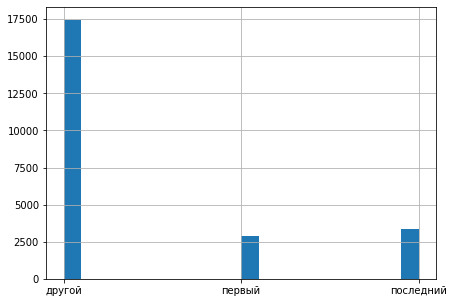

In [24]:
data
data['floor_group'].hist(bins = 20, figsize = (7,5))


исходя из графика можно сказать, что чаще всего выставляют объявления не первого или последнего этажа

In [25]:
data['locality_name'] = data['locality_name'].str.lower()
#обработаем неявные дубликаты и приведем все буквы к нижнему регистру 

In [26]:
data = data.drop_duplicates() 
#удалим строки дубликаты
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [27]:
data['locality_name'].duplicated()

0        False
1        False
2         True
3         True
4         True
         ...  
23694     True
23695     True
23696     True
23697     True
23698     True
Name: locality_name, Length: 23699, dtype: bool

In [28]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .str.replace('й', 'и')
    .replace(['поселок городского типа', 'городской посёлок', 'городское поселок', 'поселок'], 'пгт', regex=True)
)

In [29]:
data['locality_name'].unique()

array(['санкт-петербург', 'пгт шушары', 'городскои пгт янино-1',
       'пгт парголово', 'пгт мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'пгт красныи бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'пгт металлострои', 'пгт лебяжье', 'пгт сиверскии',
       'пгт молодцово', 'пгт кузьмоловскии',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'пгт аннино',
       'пгт ефимовскии', 'пгт плодовое', 'деревня заклинье',
       'пгт торковичи', 'пгт первомаиское', 'красное село',
       'пгт понтонныи', 'сясьстрои', 'деревня старая',
       'деревня лесколово', 'пгт новыи свет', 'сланцы', 'село путилово',
       'ивангород', 'мурино', 'шлиссельбург', 'никольское', 'зеленогорск',
       'сосновыи бор', 'деревня оржицы', 'деревня кальтин

In [30]:
data.duplicated().sum()

0

### Напишите общий вывод

In [31]:
data[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floors_total' , 'floor' , 'cityCenters_nearest' , 'parks_nearest']].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floors_total,floor,cityCenters_nearest,parks_nearest
count,23699.000000,21796.000000,21421.000000,2.369900e+04,23699.000000,14504.000000,23622.000000,23699.000000,18180.000000,8079.000000
mean,60.348651,34.457852,10.569807,6.541549e+06,2.070636,2.771499,10.674879,5.892358,14191.277833,490.804555
std,35.654083,22.030445,5.905438,1.088701e+07,1.078405,1.261056,6.596491,4.885249,8608.386210,342.317995
min,12.000000,2.000000,1.300000,1.219000e+04,0.000000,1.000000,1.000000,1.000000,181.000000,1.000000
25%,40.000000,18.600000,7.000000,3.400000e+06,1.000000,2.520000,5.000000,2.000000,9238.000000,288.000000
50%,52.000000,30.000000,9.100000,4.650000e+06,2.000000,2.650000,9.000000,4.000000,13098.500000,455.000000
75%,69.900000,42.300000,12.000000,6.800000e+06,3.000000,2.800000,16.000000,8.000000,16293.000000,612.000000
max,900.000000,409.700000,112.000000,7.630000e+08,19.000000,100.000000,60.000000,33.000000,65968.000000,3190.000000


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

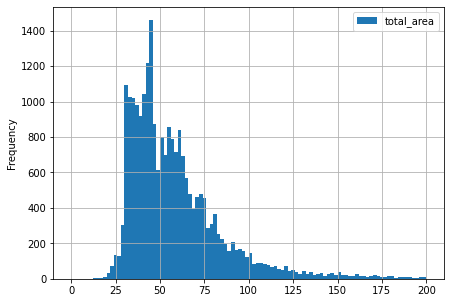

In [32]:
#изучим общую площадь
data
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (7,5), range = (0,200))
data['total_area'].describe()
#распределение данных нормальное, есть выбросы но они не сильно влияют на данные, 
#по гистограмме кроме распределения нечего больше указать, с помошью describe получили общее представление


из графика можно сказать, что объекты до 70м2 выставляют чаще

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

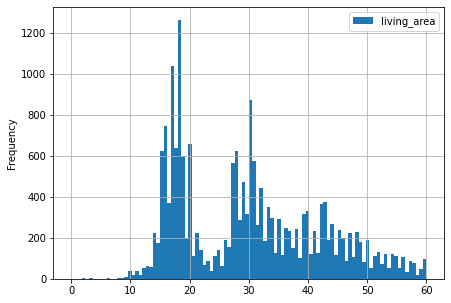

In [33]:
#изучим жилую площадь
data
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (7,5), range = (0,60))
data['living_area'].describe()
#распределение данных нормальное, есть выбросы но они не сильно влияют на данны

чаще всего выставляют на продажу помещения в жилой площадью до 40м2

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

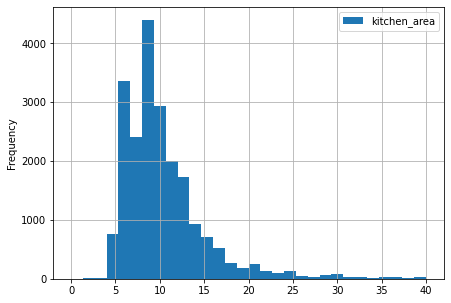

In [34]:
#изучим площадь кухни
data
data.plot(y = 'kitchen_area', kind = 'hist', bins = 30, grid=True, figsize = (7,5), range = (0,40))
data['kitchen_area'].describe()
#распределение данных нормальное, есть выбросы но они не сильно влияют на данны

в объявлениях чаще всего кухни с метражом до 20м2

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

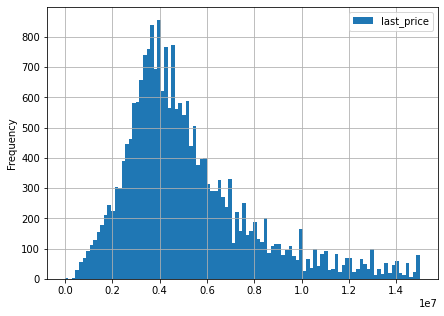

In [35]:
#изучим цену объекта
#data['last_price'] = data['last_price']/1000000
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (7,5))
data['last_price'].describe()
#с данными все впорядке, но значения выводятся в экспоненциальной записи чисел

In [36]:
#data['last_price'].max().plot(kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (7,5))

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

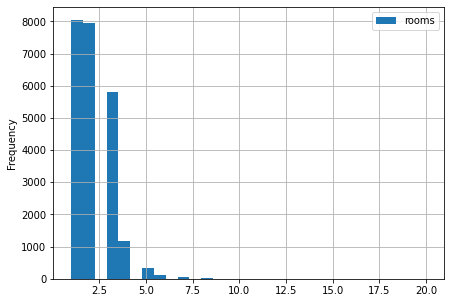

In [37]:
#изучим количество комнат
data
data.plot(y = 'rooms', kind = 'hist', bins = 30, range = (1,20), grid=True, figsize = (7,5))
data['rooms'].describe()
#с данными все впорядке

Из данных можно сказать, что нв продаже в основном квартиры до 4-х комнат, иные объекты выставлены реже 

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

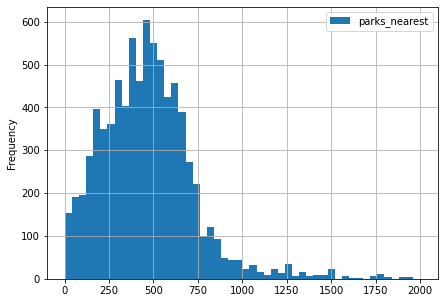

In [38]:
#изучение расстояние до ближайщего парка
data
data.plot(y = 'parks_nearest', kind = 'hist',bins = 50, range = (1,2000),  grid=True, figsize = (7,5))
data['parks_nearest'].describe()

исходя из графика можно сказать, что расспределение данных нормальное, имеются выбросы, но они не сильно влияют на данные

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

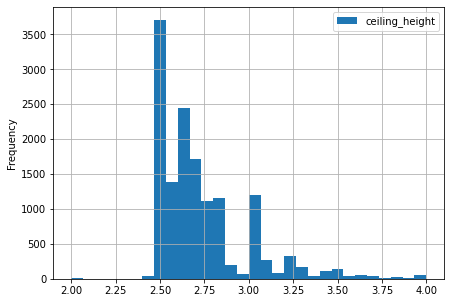

In [39]:
#изучим высоту потолков
data
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,4), grid=True, figsize = (7,5))
data['ceiling_height'].describe()
#с данными все впорядке
#распределение данных нормальное, есть выбросы но они не сильно влияют на данные

график отображает, что чаще всего в объявлениях встречаются потолки 2,5 метра

count    23622.000000
mean        10.674879
std          6.596491
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

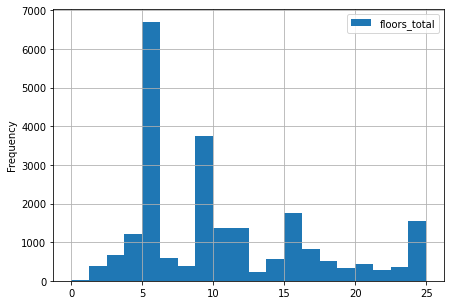

In [40]:
#изучим общее количество этажей в доме
data
data.plot(y = 'floors_total', kind = 'hist', bins = 20, range = (0,25), grid=True, figsize = (7,5))
data['floors_total'].describe()
#с данными все впорядке
#распределение данных нормальное, есть выбросы но они не сильно влияют на данные

из графика можно сказать, что в городе предобладает постройка невысоких зданий до 10 этажей

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

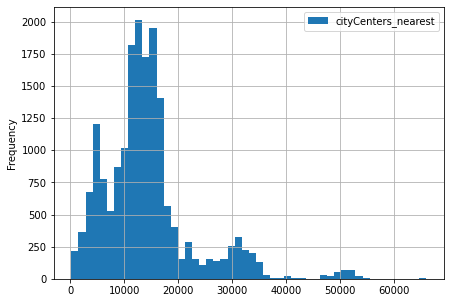

In [41]:
#изучим расстояние до центра города в метрах;
data
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 50, grid=True, figsize = (7,5))
data['cityCenters_nearest'].describe()

распределение данных нормальное, есть выбросы но они не сильно влияют на данные

In [42]:
#cityCenters_nearest

In [43]:
data['days_exposition'].mean()
#посчитаем среднее

180.88863436982163

из данных мы видим, что средний показатель не превышает норму, что означает, что даже небольшое кол-во выбрасов не сильно влияет на данные

In [44]:
data['days_exposition'].median()
#посчитаем медиану

95.0

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

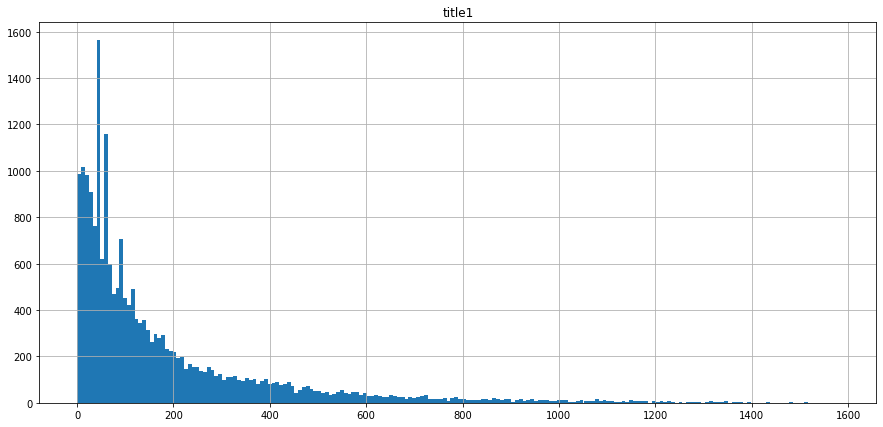

In [45]:
import matplotlib.pyplot as plt
data['days_exposition'].hist(bins=200, figsize=(15,7))
plt.title('title1')
plt.xlabel
plt.ylabel

средняя показывает, что кв-ра в среднем за 156 дней, а медиана отображает 74 дня. Из графике мы видим, что большая часть квартир продается в его начале, то есть где то в течении 100 дней. Есть квартиры, которые продаются намного дольше, то таких очень мало

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

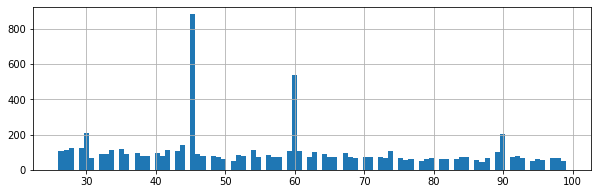

In [46]:
data.query('25<days_exposition<100')['days_exposition'].hist(bins=100, figsize=(10,3))
data['days_exposition'].describe()

создадим срез от 30 до 100 дней и выявим самые быстрые и долгие периоды продажи. из гистограммы можем сказать, что пик продаж происходит на 45, а долгим периодом продажи  считается 232 дня

0.6536750579657242

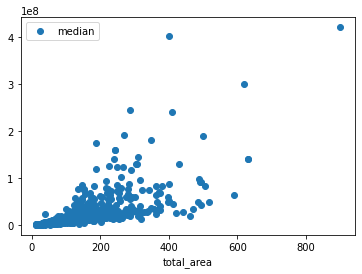

In [47]:
#зависимость цены от общей площади
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')
pivot_table_total_area.sort_values('median', ascending = False)
data['total_area'].corr(data['last_price'])

0.5198690130216392

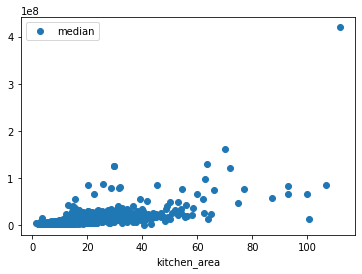

In [48]:
#зависимость цены от площади кухни
pivot_table_total_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')
pivot_table_total_area.sort_values('median', ascending = False)
data['kitchen_area'].corr(data['last_price'])

исходя из полученных данных можно сказать, что не всегда эти два фактора зависимы друг от друга, что подтверждает корреляция

да, корреляция есть, но она небольшая

0.5664915336952651

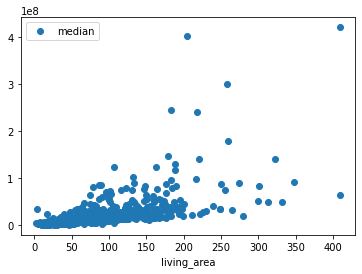

In [58]:
#зависимость цены от жилой площади
pivot_table_total_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')
pivot_table_total_area.sort_values('median', ascending = False)
data['living_area'].corr(data['last_price'])

жилая площадь чуть больше влияет на стоимость объекта, в отличии от площади кухни. Но также не является основополагающей стоимости объекта

посчитаем корреляцию по Пирсону
Коэффициент корреляции 0,65 говорит о том, что связь положительная, но сильная, поскольку не равна 1. Получается цена зависит от площади, но не всегда

0.3633428499648948

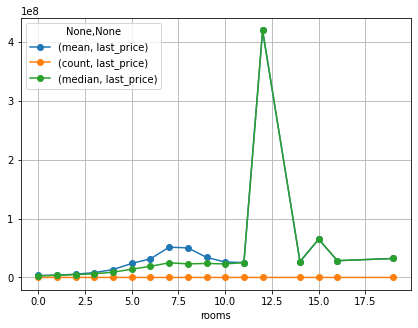

In [59]:
#зависимость цены от количества комнат
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median']).plot(grid=True, style='o-', figsize=(7, 5))
data['rooms'].corr(data['last_price'])

исходя из графика можно сказать, что самыми выгодными к покупке являются 4-х комнатные квартиры. Корреляция имеется, но связь слабая, несмотря на то, что она положительная

0.5198690130216392

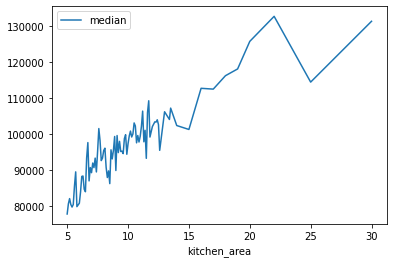

In [60]:
#зависимость цены от площади кухни
pivot_table_rooms = data.pivot_table(index = 'kitchen_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')
pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)
data['kitchen_area'].corr(data['last_price'])

исходя из графика можно сказать, что чем меньше площадь кухни, тем меньше цена. Корреляция положительная и показывает, что в половине случае цена зависит от метража кухни

0.5664915336952651

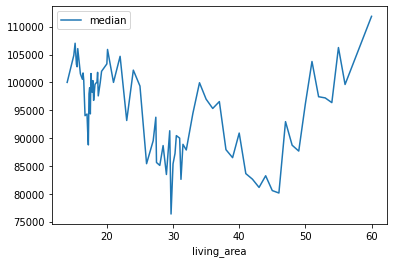

In [61]:
#зависимость цены от жилой площади
pivot_table_rooms = data.pivot_table(index = 'living_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')
pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)
data['living_area'].corr(data['last_price'])

из графика можно сказать, что выгодней всег приобретать квартиры примерно 30 и 45 м. Корреляция положительная, но не сильная

0.0015501452176215405

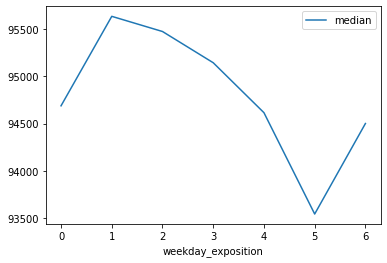

In [62]:
#зависимость цены от даты размещения (день)
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')
pivot_table_weekday_exposition.sort_values('median', ascending = False)

data['weekday_exposition'].corr(data['last_price'])

из гарфика можно сказать, что наивысший пик стоимость объекта приходится на вторник. Корреляция очень слабая

0.0027791287507397166

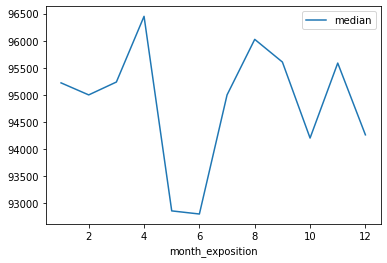

In [54]:
#зависимость цены от даты размещения (месяц)
data['month_exposition'] = data['first_day_exposition'].dt.month
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')
pivot_table_month_exposition.sort_values('median', ascending = False)
data['month_exposition'].corr(data['last_price'])

по результатам таблицы можно сказать, что наибольшая стоимость объектов на рынке в апреле и августе, а наименьшая в мае и июне. Корреляция показывает минимальную связь

-0.043089036199508615

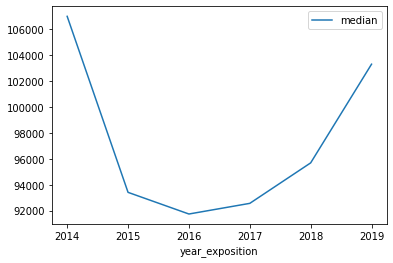

In [55]:
#зависимость цены от даты размещения (год)
data['year_exposition'] = data['first_day_exposition'].dt.year
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')
pivot_table_year_exposition.sort_values('median', ascending = False)
data['year_exposition'].corr(data['last_price'])

из графика следует, что цена объектов с 2014 по 2016 падала, а дальше цена на рынке недвижости стала расти. Корреляция отрицательная, связи нет.

Везде добавила информацию по корреляции

In [56]:
#Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table

,count,mean
locality_name,,
санкт-петербург,15721,114849.008793
пгт мурино,556,85681.762572
пгт шушары,440,78677.364318
всеволожск,398,68654.473970
пушкин,369,103125.819377
колпино,338,75424.579112
пгт парголово,327,90175.913089
гатчина,307,68746.146515
деревня кудрово,299,92473.547559


из данных видно, что самая высокая стоимость жилья в санкт-петербурге, а самая низкая в городе выборг

<AxesSubplot:xlabel='km_centre'>

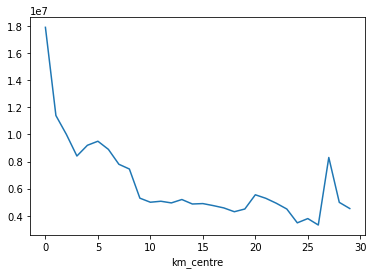

In [57]:
locality_spb = data[data['locality_name'] == "санкт-петербург"].groupby('km_centre')['last_price'].median()
locality_spb.plot()

из графика можно сказать, что квартиры расположенные в радиусе 5 км стоят дороже, чем остальные. Также имеется увеличение шкалы в промежутке от 25 до 30 км., скорее всего это говорит о стоимости недвижимости в центре близлежащих городов(Пушкин, Павловск, Кронштадт и тд.)

исходя из данных можно сказать, что чем ближе квартира к центру, тем она дороже 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.

В данной работе я обработала полученный архив данных, а именно нашла пропущенные значения там, где это необходимо, заменили типы данных на необходимые. Посчитала и добавила в таблицу цену квадратного метра жилья, вывела из даты день недели, месяц и год размещения объявления, добавила категорию по этажам квартир. Изучили следующие параметры: площадь(общаяБ жилая и кухни), цена, число комнат, высота потолков. Также, было выявлено, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. Не сильно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь. Также в ходе анализа, было выявлено, что в 2016-2017 годах стоимость квартир в среднем по рынку была ниже, а дальше пошло повышение цен.